In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#loading the placement status data in a dataframe
place_data = pd.read_csv('C:/Users/Ishant Naru/Desktop/Placement_Data_Full_Class.csv',
                         index_col='sl_no')
place_data.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0


In [3]:
#Inspecting which columns have missing values 
place_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [4]:
#loading features and target variables 
X = place_data.drop(columns=['status'])
y = place_data['status']

In [5]:
#Checking Proportions of the binary classes 
y.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [6]:
#splitting the data into train, test, validation 
from sklearn.model_selection import train_test_split as tts

X_train_full, X_test, y_train_full, y_test = tts(X, y, test_size=0.2, random_state=5, stratify=y)
X_train, X_valid, y_train, y_valid = tts(X_train_full, y_train_full, test_size=0.20, random_state=5, 
                                        stratify=y_train_full)

X_train.shape, X_valid.shape, X_test.shape

((137, 13), (35, 13), (43, 13))

In [7]:
X_train['salary'].describe()

count        94.000000
mean     283340.425532
std       73255.122496
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      650000.000000
Name: salary, dtype: float64

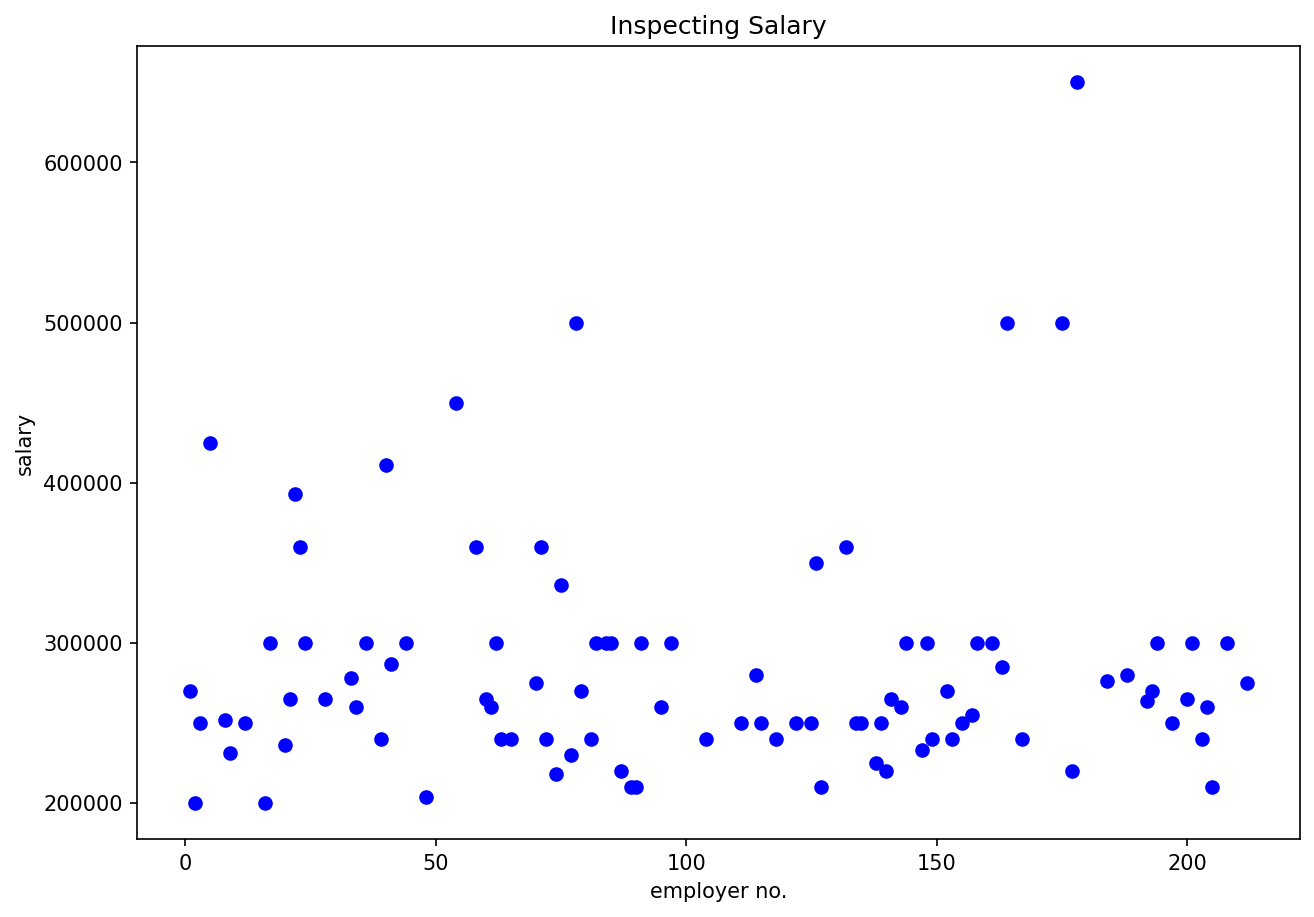

In [8]:
#Inspecting outliers visually
plt.figure(figsize=(10,7), dpi=150)
plt.scatter(X_train.index, X_train['salary'], color='blue')
plt.xlabel('employer no.')
plt.ylabel('salary')
plt.title('Inspecting Salary')
plt.show()

In [9]:
#Imputing the outliers 

q1 = place_data['salary'].quantile(0.25)
q3 = place_data['salary'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

def limit_imputer(value):
    if value > 450000:
        return 450000 
    elif value < lower_limit:
        return lower_limit 
    else:
        return value 
    

X_train['salary']=X_train['salary'].apply(limit_imputer)
X_valid['salary'] = X_valid['salary'].apply(limit_imputer)

<ipython-input-9-81f73ab21096>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['salary']=X_train['salary'].apply(limit_imputer)
<ipython-input-9-81f73ab21096>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['salary'] = X_valid['salary'].apply(limit_imputer)


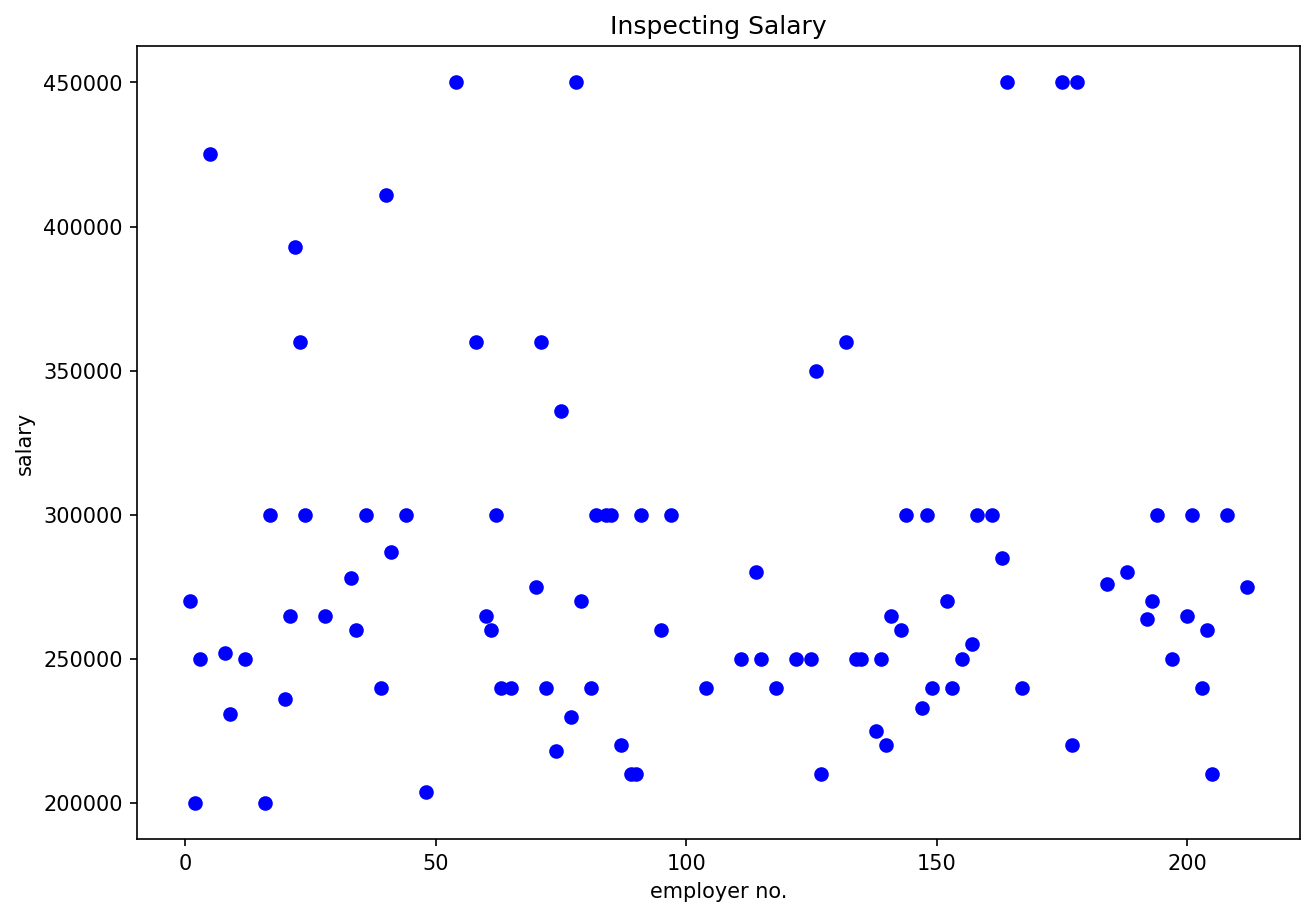

In [10]:
plt.figure(figsize=(10,7), dpi=150)
plt.scatter(X_train.index, X_train['salary'], color='blue')
plt.xlabel('employer no.')
plt.ylabel('salary')
plt.title('Inspecting Salary')
plt.show()

In [11]:
#reshaping the salary column for imputation 
column = X_train['salary'].values.reshape(-1,1)
column_1 = X_valid['salary'].values.reshape(-1,1)

In [12]:
#Imputing the missing values by mean for salary column 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
X_train['salary'] = imputer.fit_transform(column)
X_valid['salary'] = imputer.transform(column_1)


<ipython-input-12-52c8448ae401>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['salary'] = imputer.fit_transform(column)
<ipython-input-12-52c8448ae401>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['salary'] = imputer.transform(column_1)


In [13]:
X_train.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
sl_no,,,,,,,,,,,,,
135,F,77.44,Central,92.0,Others,Commerce,72.0,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,250000.0
5,M,85.80,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,425000.0
203,M,70.00,Central,63.0,Central,Science,66.0,Sci&Tech,No,61.28,Mkt&HR,60.11,240000.0
16,F,65.00,Central,75.0,Central,Commerce,69.0,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,200000.0
75,M,56.60,Central,64.8,Central,Commerce,70.2,Comm&Mgmt,No,84.27,Mkt&Fin,67.20,336000.0
178,F,73.00,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,450000.0
191,F,64.00,Others,70.2,Central,Commerce,61.0,Comm&Mgmt,No,50.00,Mkt&Fin,62.50,0.0
95,M,58.00,Central,62.0,Central,Commerce,64.0,Comm&Mgmt,No,53.88,Mkt&Fin,54.97,260000.0
157,M,84.20,Central,69.4,Central,Science,65.0,Sci&Tech,Yes,80.00,Mkt&HR,52.72,255000.0


In [14]:
#Separating numerical features and categorical features 
Numerical_columns = [col for col in X_train.select_dtypes(exclude=['object'])]
Categorical_columns = [column for column in X_train.select_dtypes(exclude=['int', 'float'])]


In [15]:
#Scaling the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_X_train = pd.DataFrame(scaler.fit_transform(X_train[Numerical_columns]), 
                           columns=Numerical_columns)
num_X_valid = pd.DataFrame(scaler.transform(X_valid[Numerical_columns]), columns=Numerical_columns)

#Restoring index after scaling
num_X_train.index = X_train.index
num_X_valid.index = X_valid.index

num_X_valid.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
120,-0.619809,0.226173,-0.244131,0.798905,0.462764,1.859489
38,1.085589,0.947388,-0.105386,-1.064338,-1.139226,0.923067
199,-0.038849,0.378008,-0.188633,1.202381,1.838995,-1.381972
68,1.265499,1.184630,0.088858,-0.255119,-0.142271,0.598921
53,-2.485439,-1.915647,-1.853577,-0.066981,0.670463,-1.381972


In [16]:
#Encoding the categorical variables to binary values
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cat_train = pd.DataFrame(encoder.fit_transform(X_train[Categorical_columns]))
OH_cat_valid = pd.DataFrame(encoder.transform(X_valid[Categorical_columns]))

#label encoding target variable 
y_train = pd.get_dummies(y_train, drop_first=True)
y_valid = pd.get_dummies(y_valid, drop_first=True)

#Restoring index after encoding 
OH_cat_train.index = X_train.index
OH_cat_valid.index = X_valid.index

#Restoring column names after encoding
OH_cat_train.columns = encoder.get_feature_names(Categorical_columns) 
OH_cat_valid.columns = encoder.get_feature_names(Categorical_columns)

OH_cat_train.head()

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,,,,,
135,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
203,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
16,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
75,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
#Combining transformed numerical features and categorical features back to a DataFrame 

Trans_X_train = pd.concat([OH_cat_train, num_X_train], axis=1)
Trans_X_valid = pd.concat([OH_cat_valid, num_X_valid], axis=1)

Trans_X_train.head(), Trans_X_train.shape

(       gender_F  gender_M  ssc_b_Central  ssc_b_Others  hsc_b_Central  \
 sl_no                                                                   
 135         1.0       0.0            1.0           0.0            0.0   
 5           0.0       1.0            1.0           0.0            1.0   
 203         0.0       1.0            1.0           0.0            1.0   
 16          1.0       0.0            1.0           0.0            1.0   
 75          0.0       1.0            1.0           0.0            1.0   
 
        hsc_b_Others  hsc_s_Arts  hsc_s_Commerce  hsc_s_Science  \
 sl_no                                                            
 135             1.0         0.0             1.0            0.0   
 5               0.0         0.0             1.0            0.0   
 203             0.0         0.0             0.0            1.0   
 16              0.0         0.0             1.0            0.0   
 75              0.0         0.0             1.0            0.0   
 
        d

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif_data = Trans_X_train

vif = pd.Series([VIF(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif

C:\Users\Ishant Naru\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


gender_F                       inf
gender_M                       inf
ssc_b_Central                  inf
ssc_b_Others                   inf
hsc_b_Central                  inf
hsc_b_Others                   inf
hsc_s_Arts                     inf
hsc_s_Commerce                 inf
hsc_s_Science                  inf
degree_t_Comm&Mgmt             inf
degree_t_Others                inf
degree_t_Sci&Tech              inf
workex_No                      inf
workex_Yes                     inf
specialisation_Mkt&Fin         inf
specialisation_Mkt&HR          inf
ssc_p                     2.528450
hsc_p                     2.000181
degree_p                  1.870743
etest_p                   1.220571
mba_p                     1.572653
salary                    1.971819
dtype: float64

In [19]:
#Reproducibilty 
np.random.seed(70)
tf.random.set_seed(70)

In [20]:
#Defining the model 

#input_size = Trans_X_train.shape[1]
ANN = keras.Sequential([
    layers.InputLayer(input_shape = (Trans_X_train.shape[1],)),  
    layers.Dense(18, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                414       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 19        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Compiling the model 

opt = keras.optimizers.Adam(learning_rate=1e-3)

ANN.compile(loss='binary_crossentropy',
           optimizer = opt,
           metrics=['accuracy'])

In [22]:
#Creating Callbacks 

checkpoint_cb=keras.callbacks.ModelCheckpoint("Placement_classifier.h5", save_best_only=True)
early_stop_cb=keras.callbacks.EarlyStopping(min_delta=0.0001, patience=8, restore_best_weights=True)

In [23]:
#Fitting the model 
history = ANN.fit(Trans_X_train, y_train,
                 epochs=200, 
                 validation_data=(Trans_X_valid, y_valid),
                 callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/200
5/5 [==============================] - 1s 63ms/step - loss: 0.7235 - accuracy: 0.4453 - val_loss: 0.7385 - val_accuracy: 0.4857
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6892 - accuracy: 0.5474 - val_loss: 0.7145 - val_accuracy: 0.5143
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6582 - accuracy: 0.5985 - val_loss: 0.6922 - val_accuracy: 0.5714
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6572 - accuracy: 0.6204 - val_loss: 0.6714 - val_accuracy: 0.5714
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6281 - accuracy: 0.6496 - val_loss: 0.6511 - val_accuracy: 0.6000
Epoch 6/200
5/5 [==============================] - 0s 17ms/step - loss: 0.5875 - accuracy: 0.6788 - val_loss: 0.6322 - val_accuracy: 0.6286
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5735 - accuracy: 0.7591 - val_loss: 0.6138 - val_accuracy: 0.6857
Epoch 8/200
5/5 [=======

Epoch 59/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1192 - accuracy: 0.9854 - val_loss: 0.1063 - val_accuracy: 1.0000
Epoch 60/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1198 - accuracy: 0.9708 - val_loss: 0.1026 - val_accuracy: 1.0000
Epoch 61/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1157 - accuracy: 0.9781 - val_loss: 0.0990 - val_accuracy: 1.0000
Epoch 62/200
5/5 [==============================] - 0s 9ms/step - loss: 0.1088 - accuracy: 0.9781 - val_loss: 0.0956 - val_accuracy: 1.0000
Epoch 63/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0968 - accuracy: 0.9854 - val_loss: 0.0923 - val_accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1105 - accuracy: 0.9854 - val_loss: 0.0893 - val_accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0927 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 1.0000
Epoch 66/200
5/5 [

Epoch 117/200
5/5 [==============================] - 0s 9ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0398 - accuracy: 0.9927 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 9ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 124/20

Epoch 175/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9927 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 176/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 177/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 178/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 179/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 180/200
5/5 [==============================] - 0s 14ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 181/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 182/2

<Figure size 2520x1260 with 0 Axes>

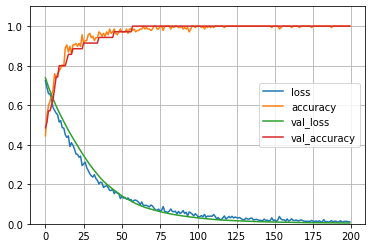

In [26]:
#Plotting Accuracy and loss curves w.r.t epochs 
plt.figure(figsize=(14,7), dpi=180)
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.show()

In [86]:
#Feature Engineering for Test Data 

#treating outliers
X_test['salary']=X_test['salary'].apply(limit_imputer)

#treating missing values
column_t = X_test['salary'].values.reshape(-1,1)
X_test['salary'] = imputer.fit_transform(column_t)

#Numerical Features scaling 
num_X_test = pd.DataFrame(scaler.fit_transform(X_test[Numerical_columns]), 
                           columns=Numerical_columns)
num_X_test.index = X_test.index

#Categorical columns encoding 
OH_cat_test = pd.DataFrame(encoder.fit_transform(X_test[Categorical_columns]))
y_test = pd.get_dummies(y_test, drop_first=True)
OH_cat_test.index = X_test.index
OH_cat_test.columns = encoder.get_feature_names(Categorical_columns) 

Trans_X_test = pd.concat([OH_cat_test, num_X_test], axis=1)

Trans_X_test.head(), Trans_X_test.shape, y_test.shape

<ipython-input-86-6bf1d1c8dece>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['salary']=X_test['salary'].apply(limit_imputer)
<ipython-input-86-6bf1d1c8dece>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['salary'] = imputer.fit_transform(column_t)


(       gender_F  gender_M  ssc_b_Central  ssc_b_Others  hsc_b_Central  \
 sl_no                                                                   
 92          0.0       1.0            1.0           0.0            1.0   
 165         1.0       0.0            1.0           0.0            1.0   
 19          1.0       0.0            1.0           0.0            1.0   
 133         0.0       1.0            0.0           1.0            0.0   
 31          1.0       0.0            1.0           0.0            1.0   
 
        hsc_b_Others  hsc_s_Commerce  hsc_s_Science  degree_t_Comm&Mgmt  \
 sl_no                                                                    
 92              0.0             1.0            0.0                 1.0   
 165             0.0             1.0            0.0                 1.0   
 19              0.0             1.0            0.0                 1.0   
 133             1.0             1.0            0.0                 1.0   
 31              0.0          

In [87]:
Trans_X_test.columns, Trans_X_train.columns

(Index(['gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
        'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
        'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech',
        'workex_No', 'workex_Yes', 'specialisation_Mkt&Fin',
        'specialisation_Mkt&HR', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p',
        'mba_p', 'salary'],
       dtype='object'),
 Index(['gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
        'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
        'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
        'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
        'specialisation_Mkt&Fin', 'specialisation_Mkt&HR', 'ssc_p', 'hsc_p',
        'degree_p', 'etest_p', 'mba_p', 'salary'],
       dtype='object'))

In [88]:
X_test['hsc_s'].unique()

#We see that the arts subject is missing in test dataset 
#Initialize a column 'hsc_s_Arts' at 5th position and assign it a float value of 0
pd.DataFrame.insert(Trans_X_test, loc=6, column='hsc_s_Arts', value = float(0))

Trans_X_test.head()

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,...,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,,,,,,,,,,,,,,,,
92,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-1.363954,-0.823064,-1.956644,-0.265662,-0.072676,-1.147402
165,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-0.013589,0.468180,-0.422994,-1.289164,0.383796,0.200270
19,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-0.384138,-0.073309,-0.343562,-0.192346,0.143020,-1.147402
133,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,-0.027841,0.093303,-0.343562,0.276882,-1.627693,0.874107
31,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-0.295063,0.551486,0.756267,-1.365414,-1.090961,0.200270


In [90]:
ANN.evaluate(Trans_X_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.0290 - accuracy: 1.0000


[0.028985153883695602, 1.0]